# Car Insurance Data

---

## Sobre o Conjunto de Dados
Contexto
A empresa compartilhou seus dados anuais de seguro de automóveis. Agora, você precisa descobrir o comportamento real dos clientes em relação aos dados.

## Conteúdo
As colunas se assemelham a características do mundo real.
A coluna de resultados indica 1 se um cliente solicitou seu empréstimo, caso contrário, 0.
Os dados têm 19 características, das quais 18 são registros correspondentes obtidos pela empresa.

Inspiração
Os dados são tão bem balanceados que ajudarão os kagglers a ter uma melhor intuição sobre clientes reais e a encontrar a história mais profunda contida neles.

Link de referencia Kaggle: https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

---

## 1 - Leitura e Análise Exploratória Inicial

In [1]:
# Bibliotecas para manipulação
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Bibliotecas para implementação de ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Bibliotecas para validar as metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
#Leitura inicial do CSV
df_original = pd.read_csv('Car_Insurance_Claim.csv')

df_original.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [3]:
#Tamanho do DF
df_original.shape

(10000, 19)

In [4]:
#Informações adicionais
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

- Algumas colunas categoricas não são númericas, possivel necessidade de tratamento (label encoding). 
- Alguns dados faltantes, como é uma quantidade pequena, provavelmente irei apagar elas do DF
- Algumas colunas deveria ser booleano ou inteiro, como por exemplo "married ou children"

In [5]:
#Verifica quantidades de Nulos
df_original.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [6]:
#Metricas das colunas númericas
df_original.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


--- 
## 2 - Tratamento do DF

### 2.1 - Tratamento no Tipo e Drop

Colunas de baixa relevancia, que serão apagadas:
- ID
- POSTAL_CODE

Colunas para alteração do tipo:
- VEHICLE_OWNERSHIP
- MARRIED
- CHILDREN
- OUTCOME

Colunas com alguns dados nulos:
- CREDIT_SCORE
- ANNUAL_MILEAGE

In [7]:
#Dropar coluna ID
df_tratado = df_original.drop(['ID', 'POSTAL_CODE'], axis=1) #Parametro axis=1 indica que é uma COLUNA

df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  ANNUAL_MILEAGE       9043 non-null   float64
 12  VEHICLE_TYPE         10000 non-null  object 
 13  SPEEDING_VIOLATIONS  10000 non-null  int64  
 14  DUIS                 10000 non-null  int64  
 15  PAST_ACCIDENTS       10000 non-null  

In [8]:
#Converter colunas que tem valores 0 ou 1, para inteiro
df_tratado[['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'OUTCOME']] = df_tratado[['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'OUTCOME']].astype(int)

In [9]:
#Removendo colunas com valores NaN
df_tratado = df_tratado.dropna(axis=0) #Axis=0 para dropar somente as linhas que contem vazio

In [10]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  8149 non-null   object 
 1   GENDER               8149 non-null   object 
 2   RACE                 8149 non-null   object 
 3   DRIVING_EXPERIENCE   8149 non-null   object 
 4   EDUCATION            8149 non-null   object 
 5   INCOME               8149 non-null   object 
 6   CREDIT_SCORE         8149 non-null   float64
 7   VEHICLE_OWNERSHIP    8149 non-null   int64  
 8   VEHICLE_YEAR         8149 non-null   object 
 9   MARRIED              8149 non-null   int64  
 10  CHILDREN             8149 non-null   int64  
 11  ANNUAL_MILEAGE       8149 non-null   float64
 12  VEHICLE_TYPE         8149 non-null   object 
 13  SPEEDING_VIOLATIONS  8149 non-null   int64  
 14  DUIS                 8149 non-null   int64  
 15  PAST_ACCIDENTS       8149 non-null   int64 

---
## 3 - Visualizações Graficas

### 3.1 - Heatmap

Objetivo: Verifica correlações entre variaveis númericas

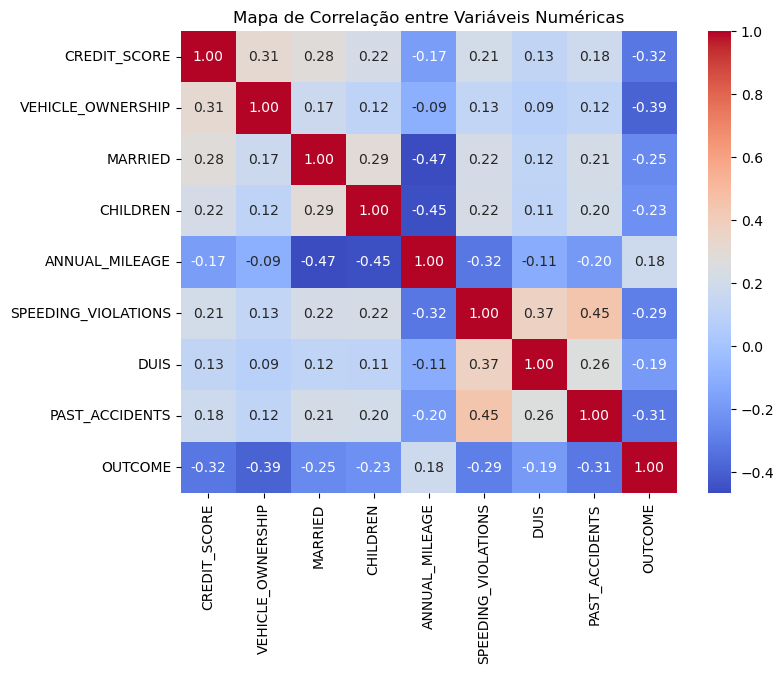

In [11]:
#Define nova variavel com as colunas numericas
numerical_cols = df_tratado.select_dtypes(include=['int64', 'float64']).columns


#Define nova variavel com a correlação
corr = df_tratado[numerical_cols].corr()

#Grafico de Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

### 3.2 - Boxplots Por Variavel Númerica

Objetivo: Visualizar outlier e dispersão dos dados

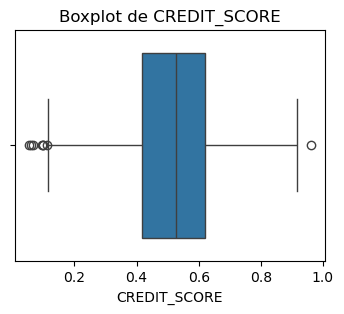

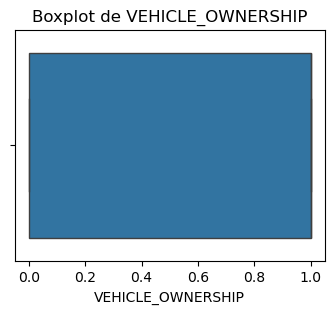

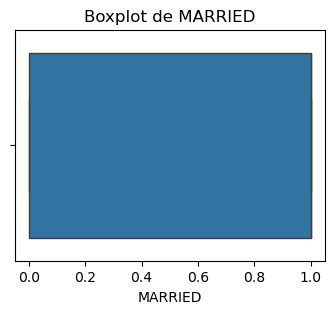

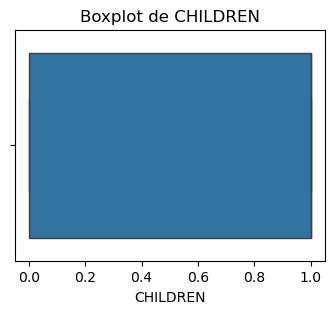

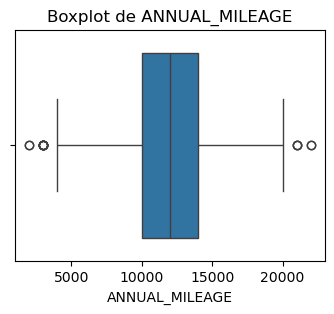

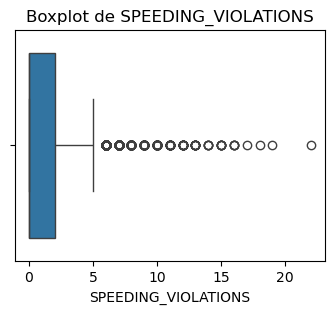

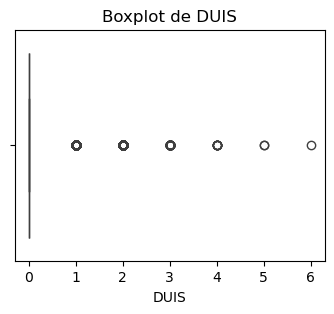

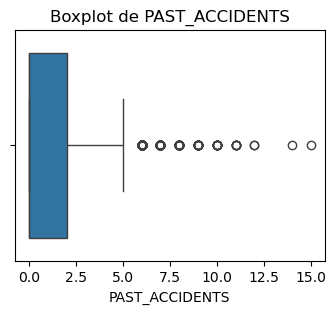

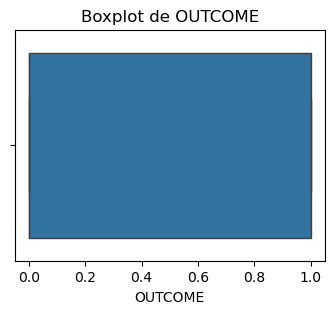

In [12]:
#Laço que passa por todas as colunas númericas
for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data=df_tratado, x=col)
    plt.title(f'Boxplot de {col}')
    plt.show()

### 3.3 - Histplot

Objetivo: Verificar distribuição das colunas númericas

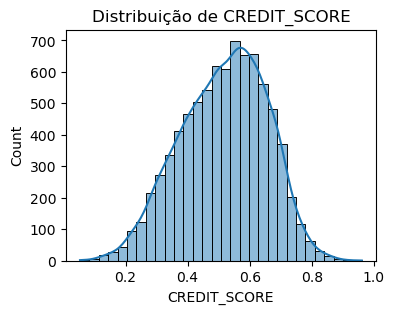

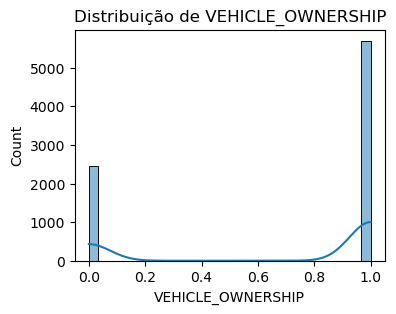

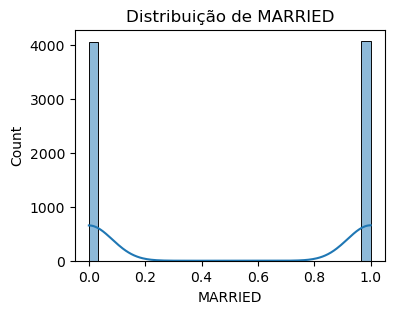

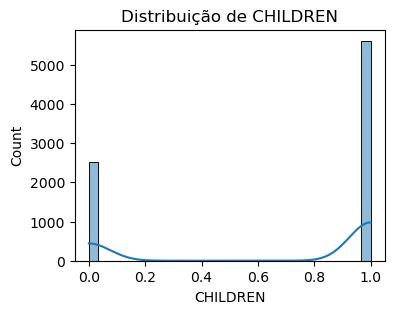

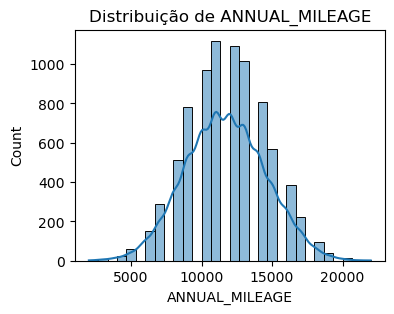

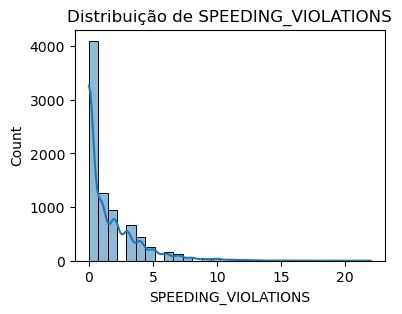

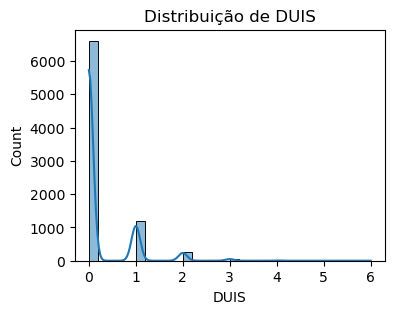

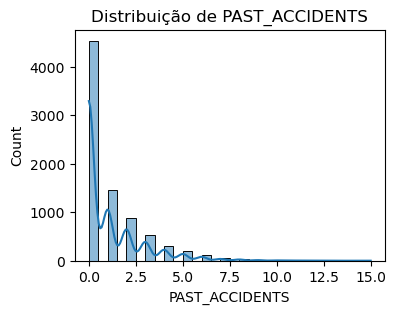

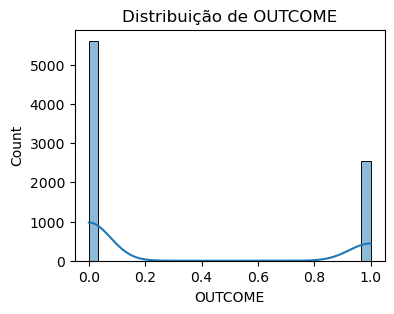

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(data=df_tratado, x=col, kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.show()

---
## 3 - Implementação de Modelos de ML

Primeira tentativa, será sem o tratamento das Variáveis Categóricas Nominais

### 3.1 - Dividir a o DF

In [14]:
#Separa o DF em Variáveis Categóricas Númericas
df_columns_numericas = df_tratado.select_dtypes(include=['int64', 'float64'])

#Dividi o DF em X e y
X = df_columns_numericas.drop('OUTCOME', axis=1)
y = df_columns_numericas['OUTCOME']

#Dividi o DF em X_train, X_test, y_train e y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.2 - Model LogisticRegression

In [15]:
#Treina o Modelo
model_lr = LogisticRegression(max_iter=100)
model_lr.fit(X_train, y_train)

#Previsões
y_pred_lr = model_lr.predict(X_test)

#Imprimi metricas de avaliação
print('Acurácia', accuracy_score(y_test, y_pred_lr))
print('Precisão', precision_score(y_test, y_pred_lr))
print('Recall', recall_score(y_test, y_pred_lr))
print('F1-Score', f1_score(y_test, y_pred_lr))
print('\nRelatório completo:')
print(classification_report(y_test, y_pred_lr))


Acurácia 0.7883435582822086
Precisão 0.7372881355932204
Recall 0.5087719298245614
F1-Score 0.6020761245674741

Relatório completo:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1117
           1       0.74      0.51      0.60       513

    accuracy                           0.79      1630
   macro avg       0.77      0.71      0.73      1630
weighted avg       0.78      0.79      0.78      1630



/opt/anaconda3/envs/global/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.3 - Model RandomForrestClassifier

In [16]:
#Treina o Modelo
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

#Previsões
y_pred_rf = model_rf.predict(X_test)

#Imprimi metricas de avaliação
print('Acurácia', accuracy_score(y_test, y_pred_rf))
print('Precisão', precision_score(y_test, y_pred_rf))
print('Recall', recall_score(y_test, y_pred_rf))
print('F1-Score', f1_score(y_test, y_pred_rf))
print('\nRelatório completo:')
print(classification_report(y_test, y_pred_rf))

Acurácia 0.7613496932515338
Precisão 0.6409090909090909
Recall 0.5497076023391813
F1-Score 0.5918153200419727

Relatório completo:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1117
           1       0.64      0.55      0.59       513

    accuracy                           0.76      1630
   macro avg       0.72      0.70      0.71      1630
weighted avg       0.75      0.76      0.76      1630



---
## 4 - Feature Engineering

Os modelos não performaram bem, vou adicionar novas variaveis, tratando algumas variáveis categóricas

In [ ]:
#Cria novo DF, com as variáveis categoricas
df_columns_categoricas = df_tratado.select_dtypes(include=['object']).columns.tolist()

#Laço para visualizar valores únicos em cada coluna. Para determinar se elas são: nominais, ordinais ou binárias
for col in df_columns_categoricas:
    print(f"\n- Coluna: {col}")
    print(df_tratado[col].unique())


- Coluna: AGE
['65+' '16-25' '26-39' '40-64']

- Coluna: GENDER
['female' 'male']

- Coluna: RACE
['majority' 'minority']

- Coluna: DRIVING_EXPERIENCE
['0-9y' '10-19y' '20-29y' '30y+']

- Coluna: EDUCATION
['high school' 'none' 'university']

- Coluna: INCOME
['upper class' 'poverty' 'working class' 'middle class']

- Coluna: VEHICLE_YEAR
['after 2015' 'before 2015']

- Coluna: VEHICLE_TYPE
['sedan' 'sports car']


### 4.1 - Tratamento Variáveis Binárias

In [21]:
#Cria um novo Dicionário para variáveis binárias
df_columns_binarias = {
    'GENDER': {'female': 0, 'male': 1},
    'RACE': {'majority': 0, 'minority': 1},
    'VEHICLE_YEAR': {'after 2015': 0, 'before 2015': 1},
    'VEHICLE_TYPE': {'sedan': 0, 'sports car': 1}
}

#Laço for para percorrer e aplicar as alterações nessas colunas
for col, mapping in df_columns_binarias.items():
    df_tratado[col] = df_tratado[col].map(mapping)

### 4.2 - Tratando Variáveis Ordinais

In [22]:
#Cria um novo Dicionário para variáveis ordinais
ordinal_mappings = {
    'AGE': {'16-25': 1, '26-39': 2, '40-64': 3, '65+': 4},
    'DRIVING_EXPERIENCE': {'0-9y': 1, '10-19y': 2, '20-29y': 3, '30y+': 4},
    'EDUCATION': {'none': 0, 'high school': 1, 'university': 2},
    'INCOME': {'poverty': 0, 'working class': 1, 'middle class': 2, 'upper class': 3}
}

#Laço for para percorrer e aplicar as alterações nessas colunas
for col, mapping in ordinal_mappings.items():
    df_tratado[col] = df_tratado[col].map(mapping)

---
## 5 - Nova rodada de ML (utilizando o df_tratado, após ajustes de algumas variaveis)

In [24]:
#Dividi o DF em X e y
X = df_tratado.drop('OUTCOME', axis=1)
y = df_tratado['OUTCOME']

#Dividi o DF em X_train, X_test, y_train e y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.1 - Model LogistRegression

In [26]:
#Treina o Modelo
model_lr = LogisticRegression(max_iter=100)
model_lr.fit(X_train, y_train)

#Previsões
y_pred_lr = model_lr.predict(X_test)

#Imprimi metricas de avaliação
print('Acurácia', accuracy_score(y_test, y_pred_lr))
print('Precisão', precision_score(y_test, y_pred_lr))
print('Recall', recall_score(y_test, y_pred_lr))
print('F1-Score', f1_score(y_test, y_pred_lr))
print('\nRelatório completo:')
print(classification_report(y_test, y_pred_lr))

Acurácia 0.8404907975460123
Precisão 0.7720430107526882
Recall 0.6998050682261209
F1-Score 0.7341513292433538

Relatório completo:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1117
           1       0.77      0.70      0.73       513

    accuracy                           0.84      1630
   macro avg       0.82      0.80      0.81      1630
weighted avg       0.84      0.84      0.84      1630



/opt/anaconda3/envs/global/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5.2 - Model RandomForrestClassifier

In [25]:
#Treina o Modelo
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

#Previsões
y_pred_rf = model_rf.predict(X_test)

#Imprimi metricas de avaliação
print('Acurácia', accuracy_score(y_test, y_pred_rf))
print('Precisão', precision_score(y_test, y_pred_rf))
print('Recall', recall_score(y_test, y_pred_rf))
print('F1-Score', f1_score(y_test, y_pred_rf))
print('\nRelatório completo:')
print(classification_report(y_test, y_pred_rf))

Acurácia 0.8239263803680982
Precisão 0.7383966244725738
Recall 0.682261208576998
F1-Score 0.7092198581560284

Relatório completo:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1117
           1       0.74      0.68      0.71       513

    accuracy                           0.82      1630
   macro avg       0.80      0.79      0.79      1630
weighted avg       0.82      0.82      0.82      1630

